<a href="https://colab.research.google.com/github/ccsed/ProgettoLabAI/blob/main/File1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Collego colab a google dirve


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importo le librerie necessarie

In [25]:
import os
import numpy as np
import rasterio
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import albumentations as A
from PIL import Image
import matplotlib.pyplot as plt

In [39]:
img_name = '/content/drive/MyDrive/Data/SN6_buildings_AOI_11_Rotterdam_train/train/AOI_11_Rotterdam/SAR-Intensity/SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190804111224_20190804111453_tile_8679.tif'

with rasterio.open(img_name) as src:
    image = src.read([1, 2, 3])
    image = image.transpose(1, 2, 0)
    image = image.astype(np.float32)

<function matplotlib.pyplot.show(close=None, block=None)>

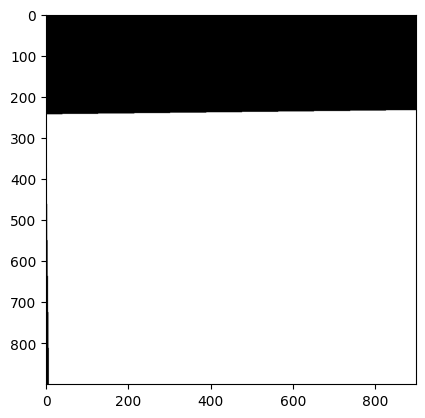

In [38]:
plt.imshow(image)
plt.show

Definiamo il dataset

In [23]:
class SARDataset(Dataset):
  def __init__(self, image_dir, transform=None):
    self.image_dir = image_dir
    self.transform = transform
    self.image_names = sorted(os.listdir(image_dir))

  def __len__(self):
    return len(self.image_names)

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()

    img_name = os.path.join(self.image_dir, self.image_names[idx])
    with rasterio.open(img_name) as src:
      image = src.read([1, 2, 3])  # Legge i primi tre canali (RGB)
      image = image.transpose(1, 2, 0)  # Transpose per ottenere l'ordine corretto (H, W, C)

    image = Image.fromarray(image.astype('uint8'), 'RGB')

    if self.transform:
        image = self.transform(image)

    return image

Definisco le traformazioni

In [12]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0, std=0.3081)
])

Carico il dataset da drive

In [17]:
image_dir = '/content/drive/MyDrive/Data/SN6_buildings_AOI_11_Rotterdam_train/train/AOI_11_Rotterdam/SAR-Intensity'
dataset = SARDataset(image_dir=image_dir, transform=transform)

Suddivido il dataset in train, validation, test

In [18]:
train_size = int(0.7 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

Creo i DataLoader

In [19]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

In [24]:
for i_batch, images in enumerate(train_loader):
  print(i_batch, images.size())

UnidentifiedImageError: Caught UnidentifiedImageError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 49, in fetch
    data = self.dataset.__getitems__(possibly_batched_index)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataset.py", line 419, in __getitems__
    return [self.dataset[self.indices[idx]] for idx in indices]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataset.py", line 419, in <listcomp>
    return [self.dataset[self.indices[idx]] for idx in indices]
  File "<ipython-input-11-d76659323f52>", line 15, in __getitem__
    image = Image.open(img_name).convert('RGB')
  File "/usr/local/lib/python3.10/dist-packages/PIL/Image.py", line 3283, in open
    raise UnidentifiedImageError(msg)
PIL.UnidentifiedImageError: cannot identify image file '/content/drive/MyDrive/Data/SN6_buildings_AOI_11_Rotterdam_train/train/AOI_11_Rotterdam/SAR-Intensity/SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190804111224_20190804111453_tile_8689.tif'
